In [11]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import warnings
warnings.filterwarnings("ignore")

plt.ion()

In [23]:
landmarks_frame = pd.read_csv('data/faces/face_landmarks.csv')
landmarks_frame

,image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x,part_2_y,part_3_x,part_3_y,part_4_x,...,part_63_x,part_63_y,part_64_x,part_64_y,part_65_x,part_65_y,part_66_x,part_66_y,part_67_x,part_67_y
0,0805personali01.jpg,27,83,27,98,29,113,33,127,39,...,93,136,100,141,93,135,89,135,84,134
1,1084239450_e76e00b7e7.jpg,70,236,71,257,75,278,82,299,90,...,148,311,179,308,149,312,137,314,128,312
2,10comm-decarlo.jpg,66,114,65,128,67,142,68,156,72,...,128,162,136,167,127,166,121,165,116,164
3,110276240_bec305da91.jpg,42,140,45,161,51,180,61,200,73,...,144,197,180,189,147,204,136,208,125,209
4,1198_0_861.jpg,138,392,141,427,145,464,152,501,166,...,293,507,331,511,294,516,279,518,265,516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,matt-mathes.jpg,85,152,83,173,83,195,85,217,91,...,160,224,190,225,162,236,151,237,141,235
65,person-7.jpg,32,65,33,76,34,86,34,97,37,...,79,98,91,99,79,99,74,99,69,99
66,person.jpg,78,83,79,93,80,103,81,112,85,...,119,115,132,114,120,121,114,122,109,121
67,person_TjahjonoDGondhowiardjo.jpg,41,92,41,103,43,114,44,125,48,...,85,130,94,130,85,128,81,128,77,128


In [28]:
landmarks_frame.iloc[65]

image_name    person-7.jpg
part_0_x                32
part_0_y                65
part_1_x                33
part_1_y                76
                  ...     
part_65_y               99
part_66_x               74
part_66_y               99
part_67_x               69
part_67_y               99
Name: 65, Length: 137, dtype: object

In [29]:
landmarks_frame.iloc[65, 1:]

part_0_x     32
part_0_y     65
part_1_x     33
part_1_y     76
part_2_x     34
             ..
part_65_y    99
part_66_x    74
part_66_y    99
part_67_x    69
part_67_y    99
Name: 65, Length: 136, dtype: object

In [30]:
landmarks = landmarks_frame.iloc[65, 1:]
landmarks = np.asanyarray(landmarks, dtype=float)
landmarks

array([ 32.,  65.,  33.,  76.,  34.,  86.,  34.,  97.,  37., 107.,  41.,
       116.,  50., 122.,  61., 126.,  72., 127.,  83., 126.,  95., 123.,
       107., 119., 115., 111., 118., 101., 120.,  91., 122.,  80., 122.,
        68.,  39.,  52.,  45.,  46.,  53.,  44.,  61.,  46.,  68.,  49.,
        82.,  49.,  90.,  45.,  98.,  44., 106.,  46., 112.,  52.,  74.,
        57.,  74.,  63.,  74.,  69.,  74.,  75.,  67.,  83.,  70.,  84.,
        74.,  85.,  78.,  84.,  82.,  83.,  47.,  61.,  51.,  57.,  58.,
        57.,  63.,  61.,  57.,  63.,  51.,  63.,  87.,  62.,  93.,  58.,
        98.,  58., 103.,  61.,  99.,  63.,  93.,  63.,  55.,  98.,  63.,
        96.,  70.,  94.,  75.,  95.,  80.,  94.,  86.,  95.,  94.,  99.,
        86., 103.,  79., 105.,  74., 105.,  69., 105.,  62., 103.,  58.,
        99.,  70.,  98.,  74.,  98.,  79.,  98.,  91.,  99.,  79.,  99.,
        74.,  99.,  69.,  99.])

In [31]:
landmarks = landmarks.reshape(-1, 2)
landmarks

array([[ 32.,  65.],
       [ 33.,  76.],
       [ 34.,  86.],
       [ 34.,  97.],
       [ 37., 107.],
       [ 41., 116.],
       [ 50., 122.],
       [ 61., 126.],
       [ 72., 127.],
       [ 83., 126.],
       [ 95., 123.],
       [107., 119.],
       [115., 111.],
       [118., 101.],
       [120.,  91.],
       [122.,  80.],
       [122.,  68.],
       [ 39.,  52.],
       [ 45.,  46.],
       [ 53.,  44.],
       [ 61.,  46.],
       [ 68.,  49.],
       [ 82.,  49.],
       [ 90.,  45.],
       [ 98.,  44.],
       [106.,  46.],
       [112.,  52.],
       [ 74.,  57.],
       [ 74.,  63.],
       [ 74.,  69.],
       [ 74.,  75.],
       [ 67.,  83.],
       [ 70.,  84.],
       [ 74.,  85.],
       [ 78.,  84.],
       [ 82.,  83.],
       [ 47.,  61.],
       [ 51.,  57.],
       [ 58.,  57.],
       [ 63.,  61.],
       [ 57.,  63.],
       [ 51.,  63.],
       [ 87.,  62.],
       [ 93.,  58.],
       [ 98.,  58.],
       [103.,  61.],
       [ 99.,  63.],
       [ 93.,

In [32]:
landmarks_frame

,image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x,part_2_y,part_3_x,part_3_y,part_4_x,...,part_63_x,part_63_y,part_64_x,part_64_y,part_65_x,part_65_y,part_66_x,part_66_y,part_67_x,part_67_y
0,0805personali01.jpg,27,83,27,98,29,113,33,127,39,...,93,136,100,141,93,135,89,135,84,134
1,1084239450_e76e00b7e7.jpg,70,236,71,257,75,278,82,299,90,...,148,311,179,308,149,312,137,314,128,312
2,10comm-decarlo.jpg,66,114,65,128,67,142,68,156,72,...,128,162,136,167,127,166,121,165,116,164
3,110276240_bec305da91.jpg,42,140,45,161,51,180,61,200,73,...,144,197,180,189,147,204,136,208,125,209
4,1198_0_861.jpg,138,392,141,427,145,464,152,501,166,...,293,507,331,511,294,516,279,518,265,516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,matt-mathes.jpg,85,152,83,173,83,195,85,217,91,...,160,224,190,225,162,236,151,237,141,235
65,person-7.jpg,32,65,33,76,34,86,34,97,37,...,79,98,91,99,79,99,74,99,69,99
66,person.jpg,78,83,79,93,80,103,81,112,85,...,119,115,132,114,120,121,114,122,109,121
67,person_TjahjonoDGondhowiardjo.jpg,41,92,41,103,43,114,44,125,48,...,85,130,94,130,85,128,81,128,77,128


In [33]:
n = 65
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:]
landmarks = np.asarray(landmarks, dtype=float).reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmark shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

Image name: person-7.jpg
Landmark shape: (68, 2)
First 4 Landmarks: [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]]


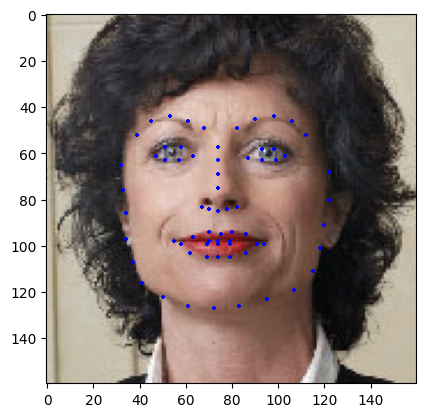

In [34]:
def show_landmarks(image, landmarks):
  """Show image with landmarks"""
  plt.imshow(image)
  plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='+', c='b')
  plt.pause(0.001) # pause a bit so that plots are updated

plt.figure()
show_landmarks(io.imread(os.path.join('data/faces/', img_name)),
               landmarks)

plt.show()

In [14]:
class FaceLandmarkDataset(Dataset):
  """Face Landmarks dataset."""

  def __init__(self, csv_file, root_dir, transform=None):
    """
    Arguments:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.landmarks_frame = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.transform = transform

  def __len__(self):
    return len(self.landmarks_frame)

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()

    img_name = os.path.join(self.root_dir,
                            self.landmarks_frame.iloc[idx, 0])
    image = io.imread(img_name)
    landmarks = self.landmarks_frame.iloc[idx, 1:]
    landmarks = np.array([landmarks], dtype=float).reshape(-1, 2)
    sample = {'image': image, 'landmarks': landmarks}

    if self.transform:
      sample = self.transform(sample)

    return sample

0 (324, 215, 3) (68, 2)


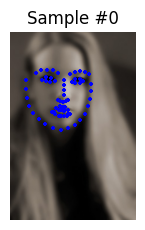

1 (500, 333, 3) (68, 2)


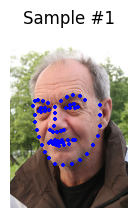

2 (250, 258, 3) (68, 2)


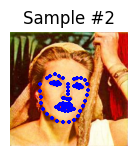

3 (434, 290, 3) (68, 2)


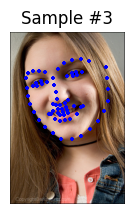

In [15]:
face_dataset = FaceLandmarkDataset(csv_file='data/faces/face_landmarks.csv',
                                   root_dir='data/faces/')

fig = plt.figure()

for i, sample in enumerate(face_dataset):
  print(i, sample['image'].shape, sample['landmarks'].shape)

  ax = plt.subplot(1, 4, i + 1)
  plt.tight_layout()
  ax.set_title("Sample #{}".format(i))
  ax.axis('off')
  show_landmarks(**sample)

  if i == 3:
    plt.show()
    break

One issue we can see from the above is that the samples are not of the same size. Mose neural networks expect the images of a fixed size. Therefore, we will need to write some preprocessing code. Let's create three transforms.

In [46]:
class Rescale(object):
    """Rescale the image in a sample to a given size.
    
    Args:
        Output_size (tuple or int): Desired output size. If tuple, output is
        matched to output_size. If int, smaller of image edges is matched
        to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size
            
        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}

class RandomCrop(object):
    """Crop randomly the image in a scale

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = torch.randint(0, h - new_h + 1, (1,)).item()
        left = torch.randint(0, w - new_w + 1, (1,)).item()

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}

class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}    

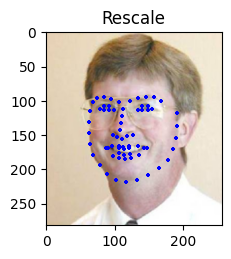

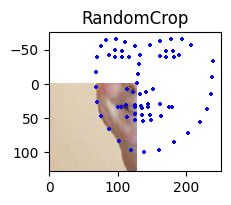

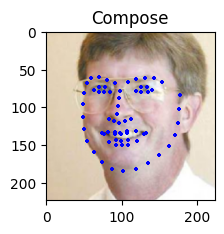

In [50]:
scale = Rescale(256)
crop = RandomCrop(128)
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[64]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

In [52]:
transformed_dataset = FaceLandmarkDataset(csv_file='data/faces/face_landmarks.csv',
                    root_dir='data/faces',
                    transform=transforms.Compose([
                        Rescale(256),
                        RandomCrop(224),
                        ToTensor()
                    ]))

for i, sample in enumerate(transformed_dataset):
    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([3, 224, 224]) torch.Size([68, 2])
1 torch.Size([3, 224, 224]) torch.Size([68, 2])
2 torch.Size([3, 224, 224]) torch.Size([68, 2])
3 torch.Size([3, 224, 224]) torch.Size([68, 2])


0 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
3 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])


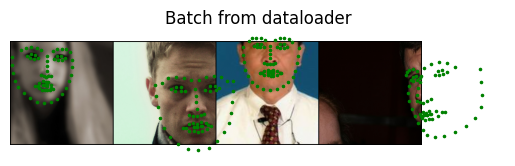

In [57]:
dataloader = DataLoader(transformed_dataset, batch_size=4, shuffle=True, num_workers=0)

# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
        sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size + (i + 1) * grid_border_size,
                    landmarks_batch[i, :, 1].numpy() + grid_border_size,
                    s=10, marker='.', c='g')
        plt.title('Batch from dataloader')

# if you are using Windows, uncomment the next line and indent the for loop.
# you might need to go back and change ``num_workers`` to 0.

# if __name__ == '__main':
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['landmarks'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break